## simple regression 구현

In [3]:
from sklearn import datasets

data = datasets.load_boston()

In [8]:
len(data.data), data.feature_names

(506, array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [11]:
X = data.data[:,0]
Y = data.target

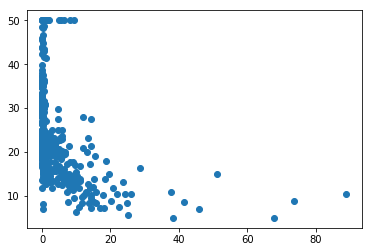

In [13]:
import  matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [14]:
import numpy as np
X = np.c_[np.ones(len(X)), X]

In [19]:
X.shape

(506, 2)

In [16]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [18]:
theta.shape

(2,)

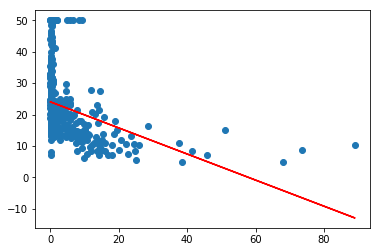

In [21]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X.dot(theta), "r-")
plt.show()

polynomial로 들어가면 (x제곱)

In [22]:
X = np.c_[X, np.power(X[:,1], 2)]
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

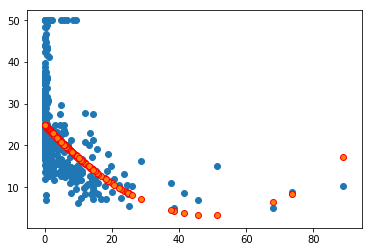

In [25]:
plt.scatter(X[:,1], Y)
plt.scatter(X[:,1], X.dot(theta), edgecolors="r")
plt.show()

차원을 더 늘릴수록 데이터를 더 구체적으로 설명하고자 한다

In [26]:
X = np.c_[X, np.power(X[:,1], 3), np.power(X[:,1], 4), np.power(X[:,1], 5), np.power(X[:,1], 6), np.power(X[:,1], 7), np.power(X[:,1], 8)]
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

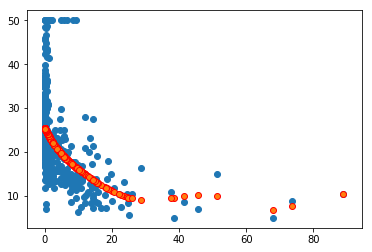

In [27]:
plt.scatter(X[:,1], Y)
plt.scatter(X[:,1], X.dot(theta), edgecolors="r")
plt.show()

## KNN 구현

In [28]:
from random import randint
N = 100
D = list((randint(1,100),randint(1,100)) for _ in range(N))
C = list(0 if sum(d)>100 else 1 for d in D)
sample = (50, 50)

In [29]:
from math import sqrt
def euc(x1, x2):
    return sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

def cos(x1, x2):
    innerProduct = x1[0]*x2[0] + x1[1]*x2[1]
    return innerProduct/(euc(x1, (0,0))*euc(x2, (0,0)))

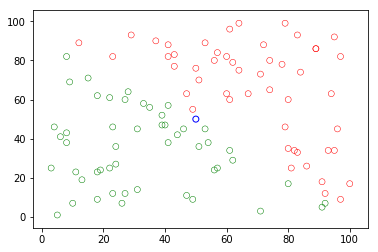

In [30]:
import matplotlib.pyplot as plt

X = [d[0] for d in D]
Y = [d[1] for d in D]
similarity = [0.0 for _ in range(N)]
colorMap = ['r', 'g', 'b']

for i in range(N):
    plt.scatter(X[i], Y[i], facecolor='none', edgecolors=colorMap[C[i]], linewidths=.5)
    similarity[i] = euc(D[i], sample)
        
plt.scatter(sample[0], sample[1], facecolor='none',edgecolors=colorMap[-1])
plt.show()

In [42]:
K = 9 # sqrt(N), C = 짝수이면, K = 홀수
candidates = sorted(list(enumerate(similarity)), key = lambda x:x[1])[:K]

In [43]:
candidateKeys = [c[0] for c in candidates]
candidatesClass = list(0 for _ in range(2))

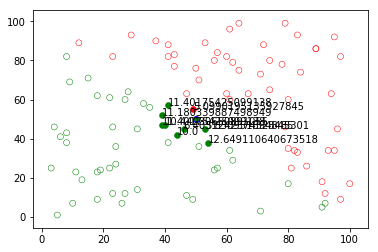

In [31]:
for i in range(N):
    plt.scatter(X[i], Y[i], facecolor=colorMap[C[i]] if i in candidateKeys else 'none', edgecolors=colorMap[C[i]], linewidths=.5)
    if i in candidateKeys:
        plt.text(X[i], Y[i], candidates[candidateKeys.index(i)][1])
        
plt.scatter(sample[0], sample[1], facecolor='r' if candidatesClass[0] > candidatesClass[1] else 'g',edgecolors=colorMap[-1])
plt.show()